# Time Series Classification

## ライブラリのインポート

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from tslearn.metrics import dtw
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mode

## k最近傍法（k-NN:  k-nearest neighbor algorithm）関数定義

In [8]:
def kNN(X, y, X_test, k=1):
    y_pred = []
    
    for i in range(len(X_test)):
        print("X_test: {}".format(i))
        dtw_list = []
        
        for j in range(len(X)):
            print("DTW distance from class{}: {}".format(y[j], dtw(X_test[i], X[j])))
            dtw_list.append([dtw(X_test[i], X[j]), y[j]])
        
        dtw_list.sort()
        print(dtw_list)
        k_list = []
        for i in range(k):
            print(dtw_list[i][1])
            k_list.append(dtw_list[i][1])
        y_pred.append(mode(k_list))
        
    return y_pred

## level1（時系列長30固定，1次元波形）

### データの読み込み

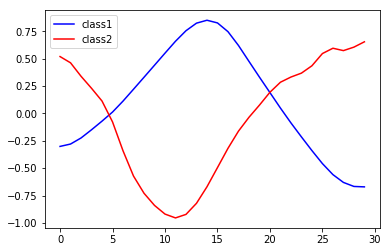

In [3]:
X = []
for i in range(2):
    X.append(np.loadtxt("./dataset/level1/reference/"+str(i+1)+".dat"))

plt.plot(X[0], color="blue", label="class1")
plt.plot(X[1], color="red", label="class2")
plt.legend()
plt.show()

### ラベリング

In [4]:
y = [1, 2]

### テストデータの読み込み

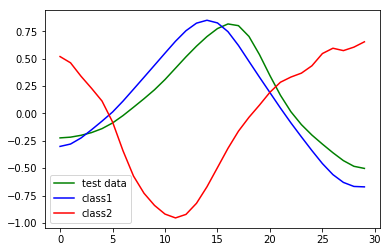

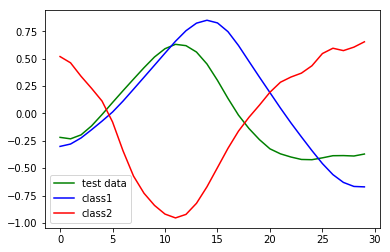

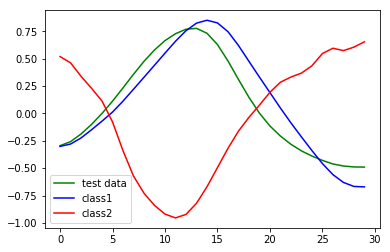

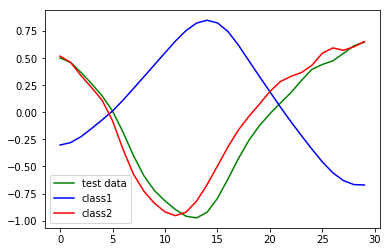

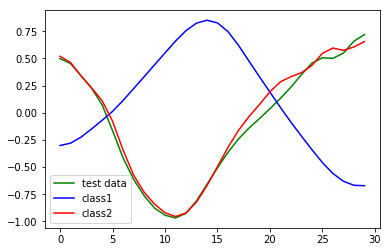

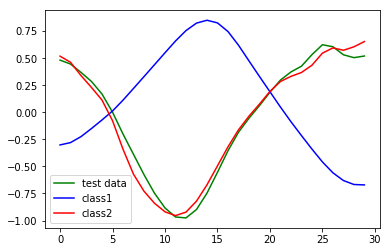

In [5]:
X_test = []
for i in range(6):
    X_test.append(np.loadtxt("./dataset/level1/test/"+str(i+1)+".dat"))

for i in range(6):
    plt.plot(X_test[i], color="green", label="test data")
    plt.plot(X[0], color="blue", label="class1")
    plt.plot(X[1], color="red", label="class2")
    plt.legend()
    plt.show()

### テストデータのラベリング

In [6]:
y_test = [1, 1, 1, 2, 2, 2]

### 予測

In [7]:
skl_kNN = KNeighborsClassifier(n_neighbors=1, metric=dtw)
skl_kNN.fit(X, y)
y_test_pred = skl_kNN.predict(X_test)
print(skl_kNN.score(X_test, y_test))
print(confusion_matrix(y_test, y_test_pred))

1.0
[[3 0]
 [0 3]]


## level2（時系列長30固定，3次元波形）

### データの読み込み

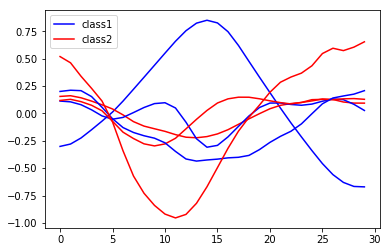

In [8]:
X = []
for i in range(2):
    X.append(np.loadtxt("./dataset/level2/reference/"+str(i+1)+".dat"))

plt.plot(X[0][:,0], color="blue", label="class1")
plt.plot(X[1][:,0], color="red", label="class2")
plt.plot(X[0][:,1], color="blue")
plt.plot(X[1][:,1], color="red")
plt.plot(X[0][:,2], color="blue")
plt.plot(X[1][:,2], color="red")
plt.legend()
plt.show()

### ラベリング

In [9]:
y = [1, 2]

### テストデータの読み込み

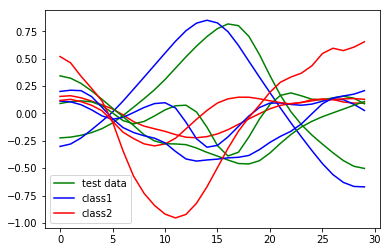

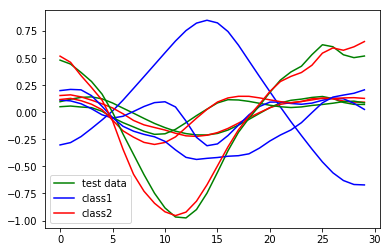

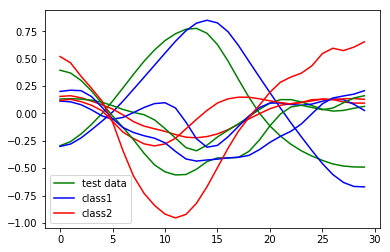

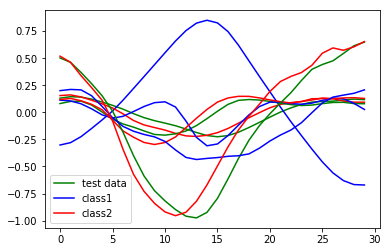

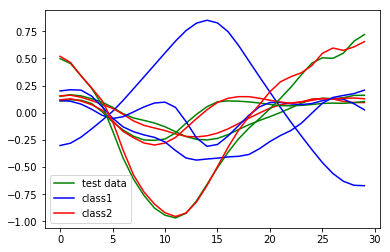

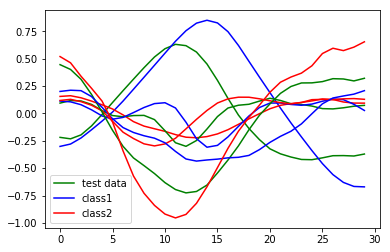

In [10]:
X_test = []
for i in range(6):
    X_test.append(np.loadtxt("./dataset/level2/test/"+str(i+1)+".dat"))

for i in range(6):
    plt.plot(X_test[i][:,0], color="green", label="test data")
    plt.plot(X[0][:,0], color="blue", label="class1")
    plt.plot(X[1][:,0], color="red", label="class2")
    plt.plot(X_test[i][:,1], color="green")
    plt.plot(X[0][:,1], color="blue")
    plt.plot(X[1][:,1], color="red")
    plt.plot(X_test[i][:,2], color="green")
    plt.plot(X[0][:,2], color="blue")
    plt.plot(X[1][:,2], color="red")
    plt.legend()
    plt.show()

### テストデータのラベリング

In [11]:
y_test = [1, 2, 1, 2, 2, 1]

### 予測

In [12]:
y_test_pred = kNN(X, y, X_test)
print(y_test_pred)
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

X_test: 0
DTW distance from class1: 0.5419951432642177
DTW distance from class2: 3.561442718331295
[[0.5419951432642177, 1], [3.561442718331295, 2]]
1
X_test: 1
DTW distance from class1: 3.7412389968760347
DTW distance from class2: 0.43133762133623355
[[0.43133762133623355, 2], [3.7412389968760347, 1]]
2
X_test: 2
DTW distance from class1: 0.7638093839708961
DTW distance from class2: 3.483873506463603
[[0.7638093839708961, 1], [3.483873506463603, 2]]
1
X_test: 3
DTW distance from class1: 3.6938061112134735
DTW distance from class2: 0.36566352777382655
[[0.36566352777382655, 2], [3.6938061112134735, 1]]
2
X_test: 4
DTW distance from class1: 3.738642758404713
DTW distance from class2: 0.34413762557442046
[[0.34413762557442046, 2], [3.738642758404713, 1]]
2
X_test: 5
DTW distance from class1: 1.323955562556765
DTW distance from class2: 2.802170080825395
[[1.323955562556765, 1], [2.802170080825395, 2]]
1
[1, 2, 1, 2, 2, 1]
1.0
[[3 0]
 [0 3]]


## level3（時系列長可変，3次元波形）

### データの読み込み

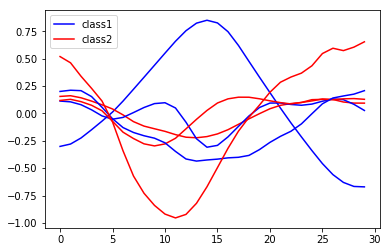

In [13]:
X = []
for i in range(2):
    X.append(np.loadtxt("./dataset/level3/reference/"+str(i+1)+".dat"))
    
plt.plot(X[0][:,0], color="blue", label="class1")
plt.plot(X[1][:,0], color="red", label="class2")
plt.plot(X[0][:,1], color="blue")
plt.plot(X[1][:,1], color="red")
plt.plot(X[0][:,2], color="blue")
plt.plot(X[1][:,2], color="red")
plt.legend()
plt.show()

### ラベリング

In [14]:
y = [1, 2]

### テストデータの読み込み

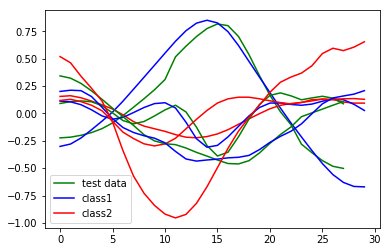

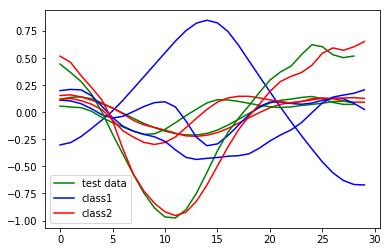

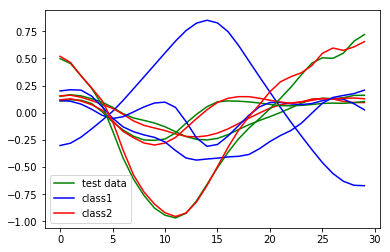

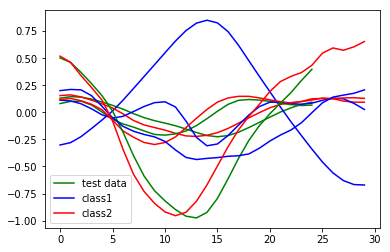

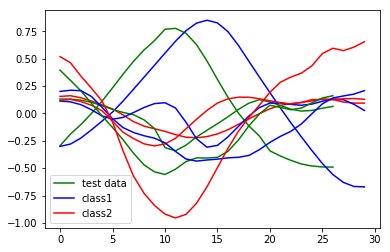

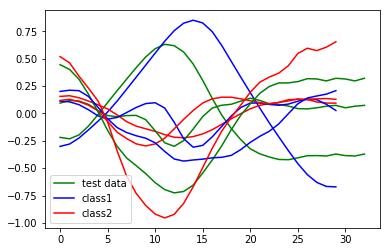

In [15]:
X_test = []
for i in range(6):
    X_test.append(np.loadtxt("./dataset/level3/test/"+str(i+1)+".dat"))

for i in range(6):
    plt.plot(X_test[i][:,0], color="green", label="test data")
    plt.plot(X[0][:,0], color="blue", label="class1")
    plt.plot(X[1][:,0], color="red", label="class2")
    plt.plot(X_test[i][:,1], color="green")
    plt.plot(X[0][:,1], color="blue")
    plt.plot(X[1][:,1], color="red")
    plt.plot(X_test[i][:,2], color="green")
    plt.plot(X[0][:,2], color="blue")
    plt.plot(X[1][:,2], color="red")
    plt.legend()
    plt.show()

### テストデータのラベリング

In [16]:
y_test = [1, 2, 2, 2, 1, 1]

### 予測

In [17]:
y_test_pred = kNN(X, y, X_test)
print(y_test_pred)
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

X_test: 0
DTW distance from class1: 0.5486082968220586
DTW distance from class2: 3.5350270837301943
[[0.5486082968220586, 1], [3.5350270837301943, 2]]
1
X_test: 1
DTW distance from class1: 3.7301572446098032
DTW distance from class2: 0.4326104674450215
[[0.4326104674450215, 2], [3.7301572446098032, 1]]
2
X_test: 2
DTW distance from class1: 3.738642758404713
DTW distance from class2: 0.34413762557442046
[[0.34413762557442046, 2], [3.738642758404713, 1]]
2
X_test: 3
DTW distance from class1: 3.425126204853334
DTW distance from class2: 0.585351778935539
[[0.585351778935539, 2], [3.425126204853334, 1]]
2
X_test: 4
DTW distance from class1: 0.7418333264237998
DTW distance from class2: 3.382778282629088
[[0.7418333264237998, 1], [3.382778282629088, 2]]
1
X_test: 5
DTW distance from class1: 1.3886867908545828
DTW distance from class2: 2.8662680018923568
[[1.3886867908545828, 1], [2.8662680018923568, 2]]
1
[1, 2, 2, 2, 1, 1]
1.0
[[3 0]
 [0 3]]


## level4（脳波データ，時系列長256固定，64次元波形）

### referenceデータでテスト(DTW距離を用いたk最近傍法)

In [9]:
X = []
X.append(np.loadtxt("./dataset/level4/reference/1/data1.dat"))
X.append(np.loadtxt("./dataset/level4/reference/2/data2.dat"))
y = [1, 2]

X_test = []
X_test.append(np.loadtxt("./dataset/level4/reference/1/data2.dat"))
X_test.append(np.loadtxt("./dataset/level4/reference/1/data3.dat"))
X_test.append(np.loadtxt("./dataset/level4/reference/2/data3.dat"))
X_test.append(np.loadtxt("./dataset/level4/reference/2/data1.dat"))
y_test = [1, 1, 2, 2]
 
y_test_pred = kNN(X, y, X_test)
print(y_test_pred)
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

X_test: 0
DTW distance from class1: 10.838870564574517
DTW distance from class2: 13.68471462166822
[[10.838870564574517, 1], [13.68471462166822, 2]]
1
X_test: 1
DTW distance from class1: 10.995515698383594
DTW distance from class2: 16.001852481672238
[[10.995515698383594, 1], [16.001852481672238, 2]]
1
X_test: 2
DTW distance from class1: 13.608020034468646
DTW distance from class2: 11.755837528126188
[[11.755837528126188, 2], [13.608020034468646, 1]]
2
X_test: 3
DTW distance from class1: 10.868288255677612
DTW distance from class2: 9.345790397745928
[[9.345790397745928, 2], [10.868288255677612, 1]]
2
[1, 1, 2, 2]
1.0
[[2 0]
 [0 2]]


### 予測(DTW距離を用いたk最近傍法)

In [19]:
X_list = []
for i in range(2):
    for j in range(3):
        X_list.append(np.loadtxt("./dataset/level4/reference/"+str(i+1)+"/data"+str(j+1)+".dat"))

X = np.array(X_list)
print(X.shape)

y = [1, 1, 1, 2, 2, 2]

X_test_list = []
for i in range(14):
    X_test_list.append(np.loadtxt("./dataset/level4/test/data"+str(i+1)+".dat"))

X_test = np.array(X_test_list)
print(X_test.shape)

y_test_pred = kNN(X, y, X_test, k=3)
print(y_test_pred)

(6, 256, 64)
(14, 256, 64)
X_test: 0
DTW distance from class1: 13.533742899907615
DTW distance from class1: 12.004909156507598
DTW distance from class1: 11.8672095664103
DTW distance from class2: 12.56573503395643
DTW distance from class2: 13.154082809656476
DTW distance from class2: 12.863650451831312
[[11.8672095664103, 1], [12.004909156507598, 1], [12.56573503395643, 2], [12.863650451831312, 2], [13.154082809656476, 2], [13.533742899907615, 1]]
1
1
2
X_test: 1
DTW distance from class1: 13.219898983214659
DTW distance from class1: 11.4282769336764
DTW distance from class1: 14.146368877362129
DTW distance from class2: 12.657395293748236
DTW distance from class2: 14.78987177644553
DTW distance from class2: 13.319204952214681
[[11.4282769336764, 1], [12.657395293748236, 2], [13.219898983214659, 1], [13.319204952214681, 2], [14.146368877362129, 1], [14.78987177644553, 2]]
1
2
1
X_test: 2
DTW distance from class1: 11.542936411173718
DTW distance from class1: 9.692085442994195
DTW distance

### referenceデータでテスト(RNN)

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam, SGD
import numpy as np
import random
from keras.utils.np_utils import to_categorical

X_list = []
for i in range(2):
    for j in range(2):
        X_list.append(np.loadtxt("./dataset/level4/reference/"+str(i+1)+"/data"+str(j+1)+".dat"))

X = np.array(X_list)
print(X.shape)

y = np.array([0, 0, 1, 1])
y = to_categorical(y)

X_val_list = []
for i in range(2):
    X_val_list.append(np.loadtxt("./dataset/level4/reference/"+str(i+1)+"/data3.dat"))

X_val = np.array(X_val_list)
print(X_val.shape)

y_val = np.array([0, 1])
y_val = to_categorical(y_val)

X_test_list = []
for i in range(14):
    X_test_list.append(np.loadtxt("./dataset/level4/test/data"+str(i+1)+".dat"))

X_test = np.array(X_test_list)
print(X_test.shape)

input_dim = 64                # 入力データの次元数：実数値1個なので1を指定
num_hidden_units = 128       # 隠れ層のユニット数
batch_size = 30             # ミニバッチサイズ
num_of_training_epochs = 100 # 学習エポック数

model = Sequential()
model.add(LSTM(
    num_hidden_units,
    input_shape=(len_sequence, input_dim),
    return_sequences=False))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=SGD(lr=0.01, momentum=0.9, decay=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])
  
model.summary()

model.fit(
    X, y,
    batch_size=batch_size,
    epochs=num_of_training_epochs,
    validation_data=(X_val, y_val)
)

print(model.predict(X_test)) 
print(model.predict_classes(X_test))

(4, 256, 64)
(2, 256, 64)
(14, 256, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 99,074
Trainable params: 99,074
Non-trainable params: 0
_________________________________________________________________
Train on 4 samples, validate on 2 samples
Epoch 1/100
4/4 [==============================] - 2s 542ms/step - loss: 0.7033 - acc: 0.2500 - val_loss: 0.6930 - val_acc: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 63ms/step - loss: 0.7005 - acc: 0.2500 - val_loss: 0.6885 - val_acc: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 69ms/step - loss: 0.6954 - acc: 0.2500 - val_loss: 0.6822 - val_acc: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 74ms/st

Epoch 59/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 91ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 62/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 77ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 66/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0015 - a